In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


# "Analyzing and Predicting Sleep Disorder"

## What will you learn from this project?
* EDA 
* Categoric and Numeric Features
* Feature Engineering
* Data Standardization and Normalization
* Data Visualization
* ML Modelling , Tuning and Evaluation


## İntroduction
Sleep is a fundamental biological process that significantly impacts the quality of human life. Adequate and quality sleep plays a crucial role in maintaining physical health, mental well-being, and overall life satisfaction. However, many people worldwide suffer from sleep disorders. Sleep disorders manifest in various ways, such as difficulty falling asleep, waking up feeling unrested, excessive daytime sleepiness, or irregular sleep patterns. These disorders not only affect an individual’s physical health but also have negative consequences on mental health and daily functioning.

In recent years, understanding sleep disorders better and developing effective treatment methods have become major research areas in the healthcare sector. In this context, analyzing and predicting sleep disorders can be beneficial both at the clinical and individual levels. With the advancement of technology, analyzing sleep data holds great potential for early detection of sleep disorders and finding effective treatments.

This study aims to analyze sleep disorders and predict the risk of future sleep issues. By utilizing data-driven approaches and machine learning techniques, various factors related to individuals' sleep patterns will be considered to predict the risk of sleep disorders. Through this, it is expected to contribute to early interventions and the development of personalized treatment strategies.


![](https://www.verywellhealth.com/thmb/NYQSoa2QZuOiVged9b5NEGyVrdY=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/VWH-LauraPorter-InsomniavsSleepApnea-Standard-8fa2b9135a3c45dd95ce3177af664176.jpg)

## Data Content
1. Person ID: Unique identifier for each person.
2.  Gender: Gender of the person (Male).
3. Age: Age of the person.
4. Occupation: The job or occupation of the person.
5. Sleep Duration: Number of hours of sleep per day.
6. Quality of Sleep: A rating of the quality of sleep (on a scale of 1 to 10).
7. Physical Activity Level: Amount of physical activity (on a scale of 1 to 10).
8. Stress Level: Level of stress (on a scale of 1 to 10).
9. BMI Category: Classification of Body Mass Index (e.g., Overweight, Normal, Obese).
10. Blood Pressure: Blood pressure value (e.g., 126/83).
11. Heart Rate: Heart rate per minute.
12. Daily Steps: Number of steps walked daily.
13. Sleep Disorder: Information about any sleep disorder, if applicable (e.g., Sleep Apnea).

### Read and Analyze Data


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
# describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [6]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### Missing Value and Unique Counts Analysis

In [7]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
df["Stress Level"].value_counts()

Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64

In [9]:
def func(df):
    
    for column in df.columns:
        print(f"Unique counts for column: {column}")
        print(df[column].unique())
        print()  

In [10]:
func(df)

Unique counts for column: Person ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 23

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

<Axes: >

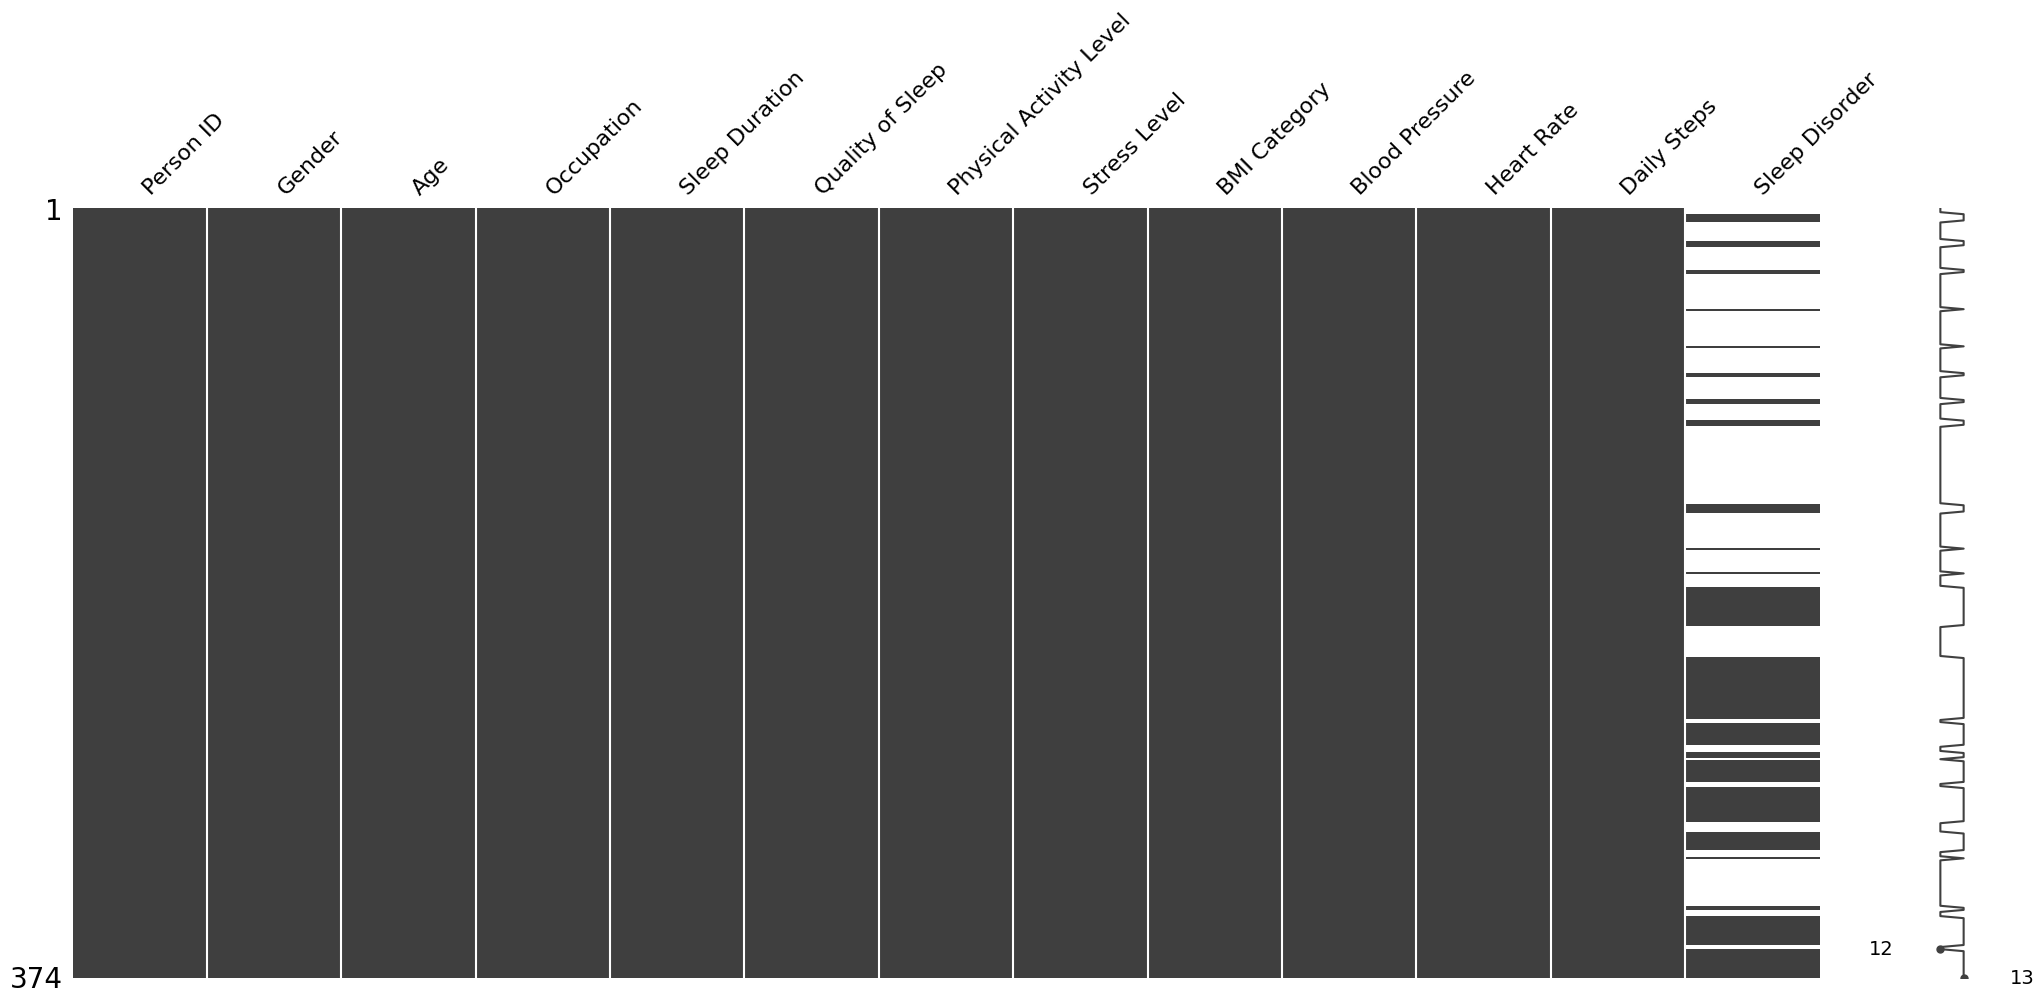

In [12]:
msno.matrix(df)

In [13]:
df["Sleep Disorder"].fillna("Nothing",inplace=True)

<ipython-input-13-5b15a1d494ce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sleep Disorder"].fillna("Nothing",inplace=True)


In [14]:
df[["Sleep Disorder"]].value_counts()

Sleep Disorder
Nothing           219
Sleep Apnea        78
Insomnia           77
Name: count, dtype: int64

In [15]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


## Analysis and Visualization

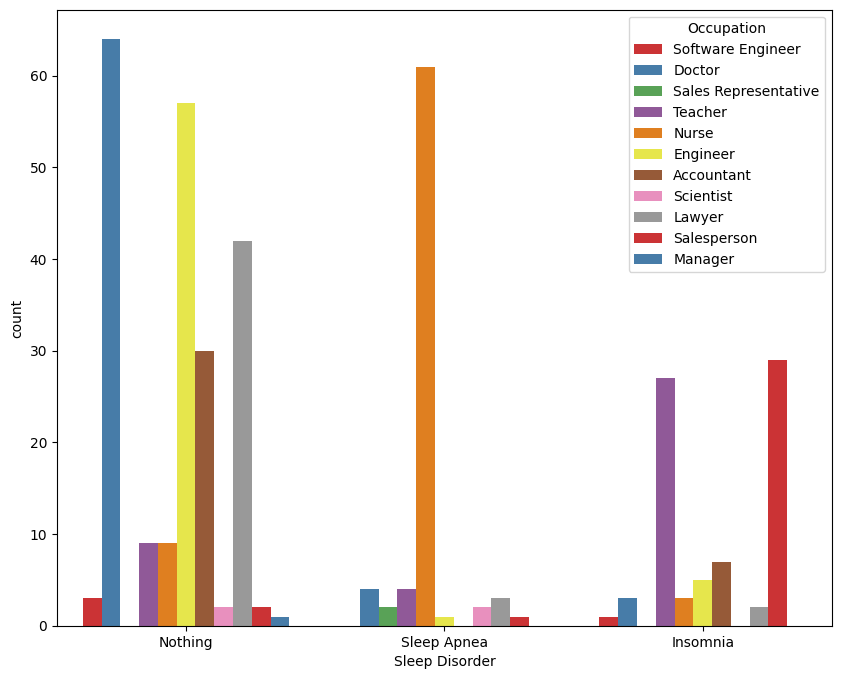

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(hue="Occupation",x="Sleep Disorder",data=df,palette="Set1")
plt.show()    

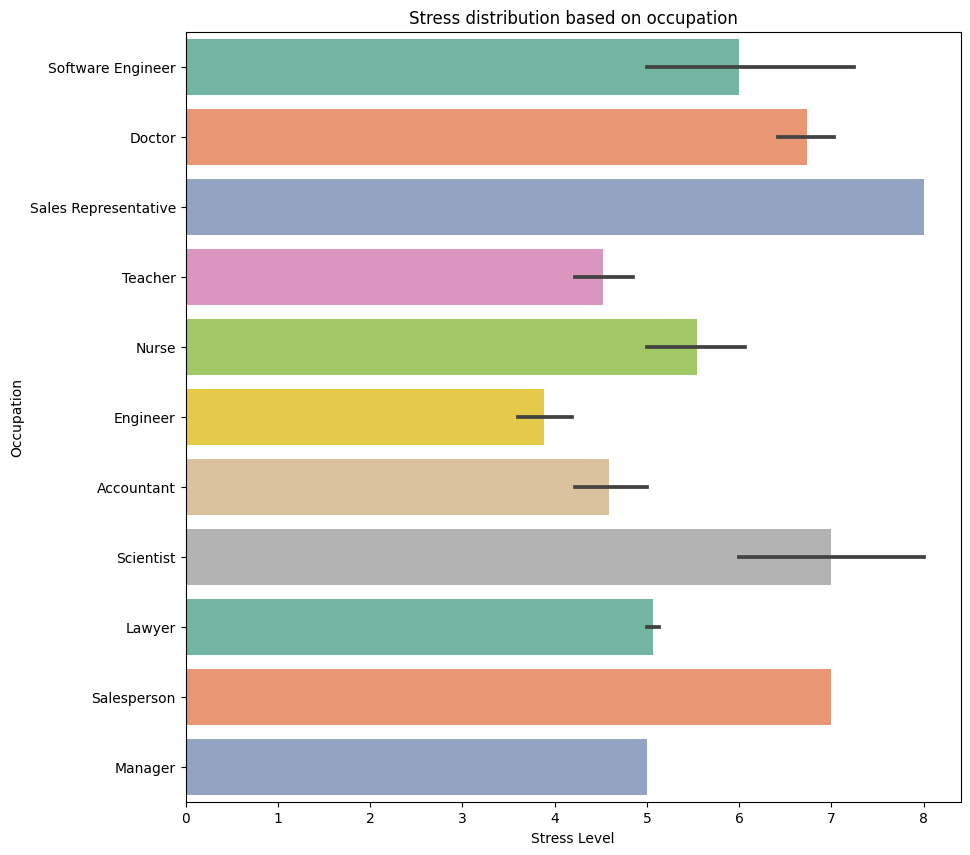

In [18]:
plt.figure(figsize=(10,10))
plt.title("Stress distribution based on occupation")
sns.barplot(y="Occupation",x="Stress Level",data=df,palette="Set2")
plt.show()


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_barplots(df):
    for column in df.columns:
        if column != "Sleep Duration":  
            plt.figure(figsize=(10, 10))  
            sns.barplot(y=column, x="Sleep Duration", data=df, palette="Set3")
            plt.title(f"Sleep Duration vs {column}")  
            plt.show() 


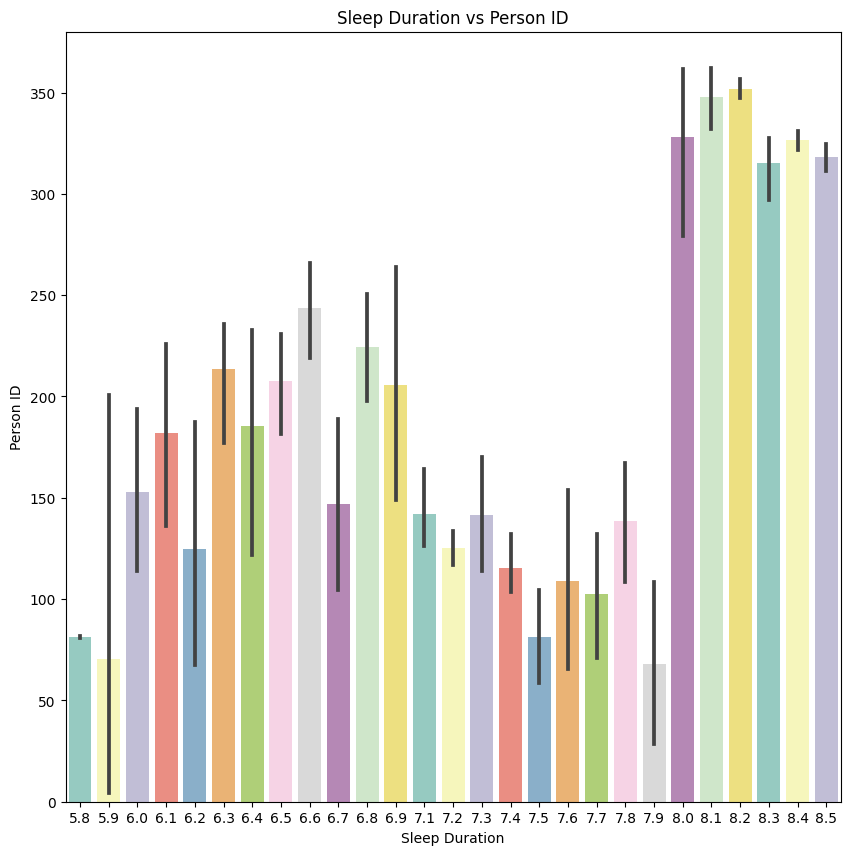

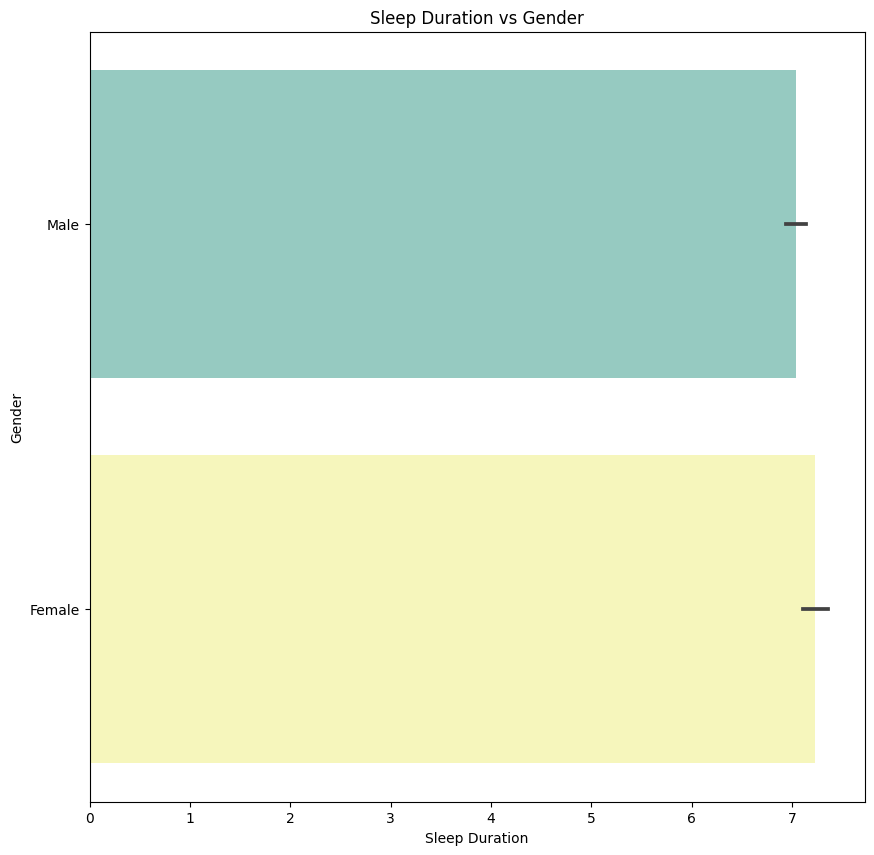

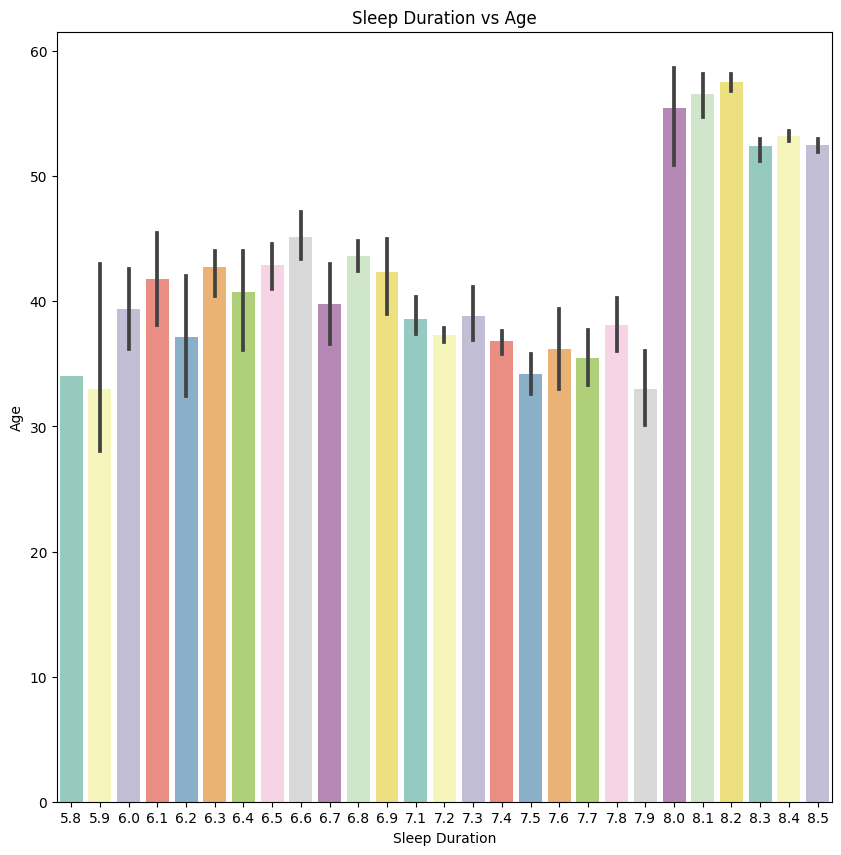

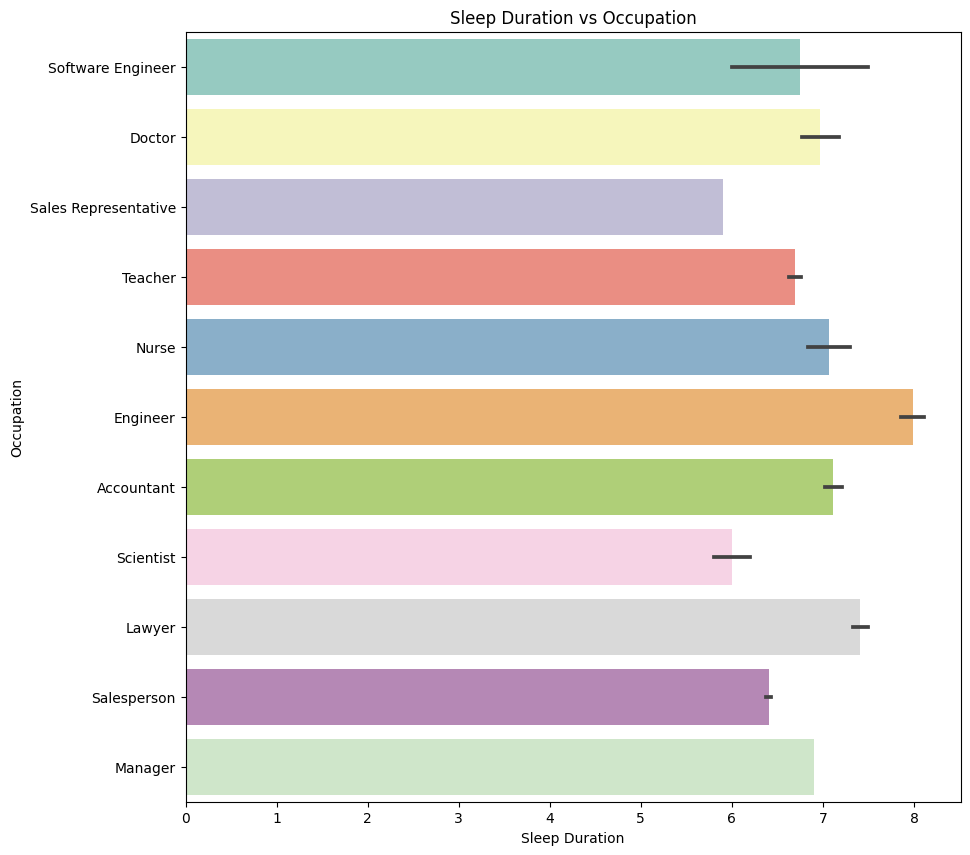

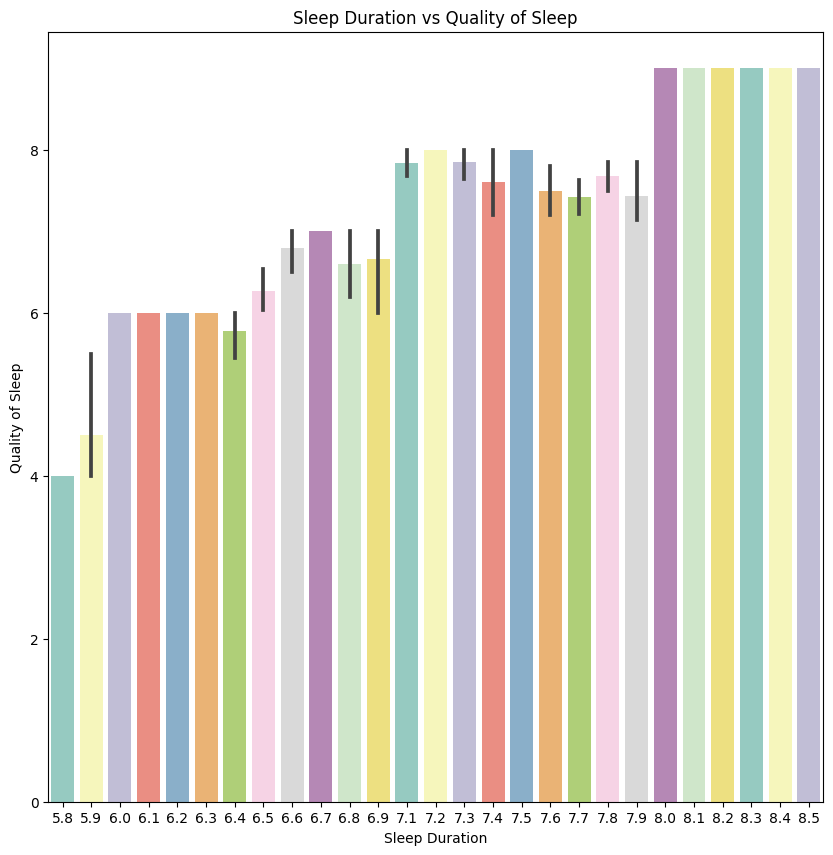

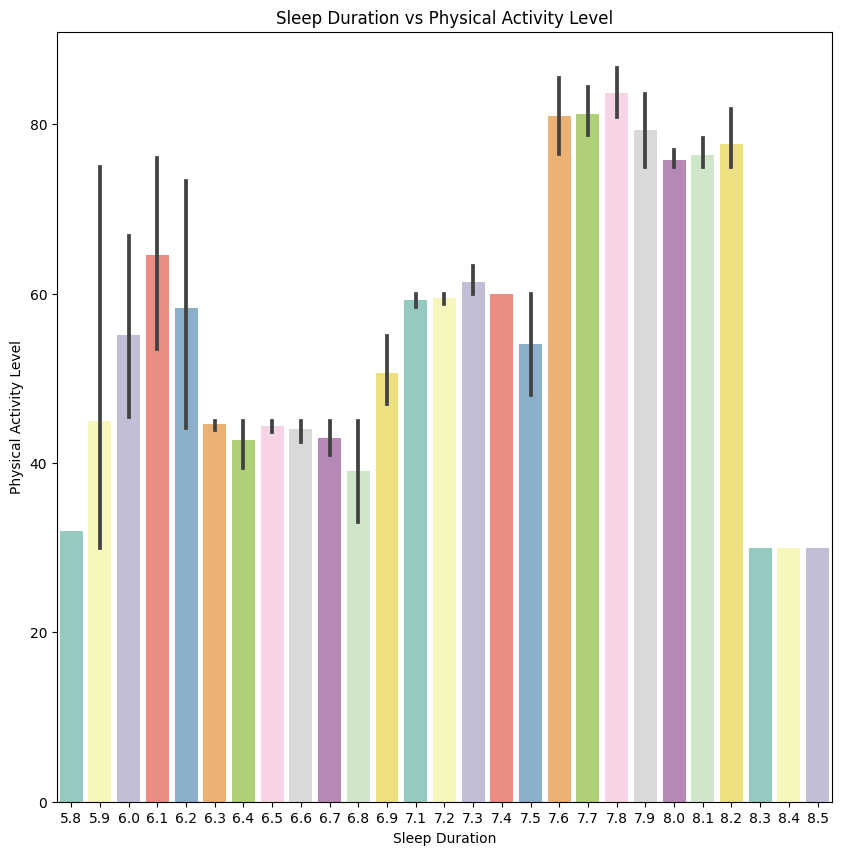

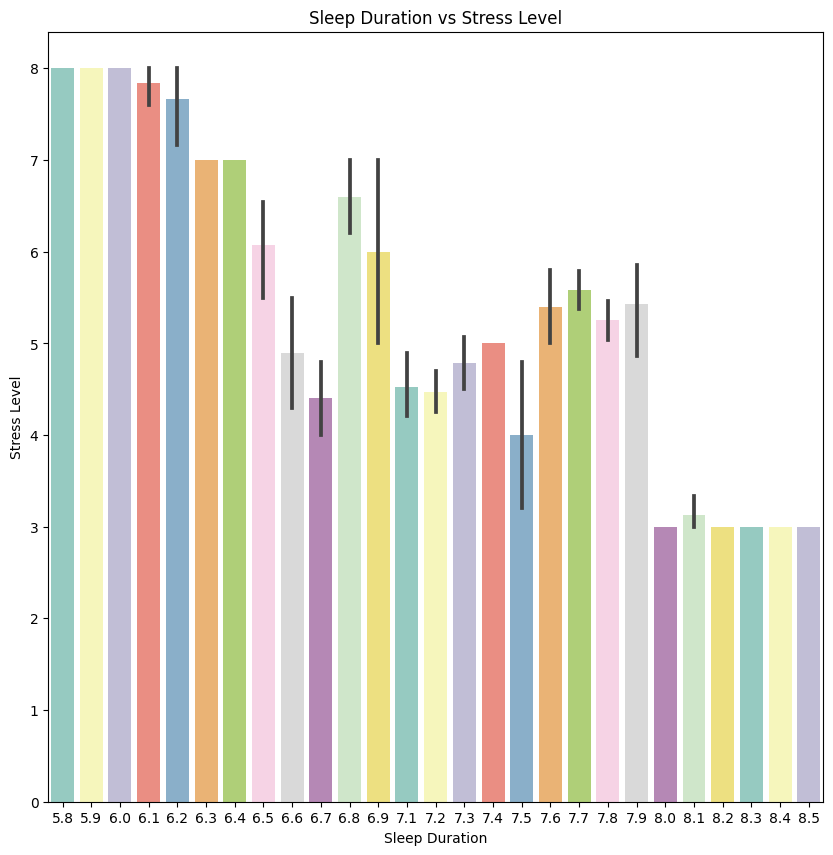

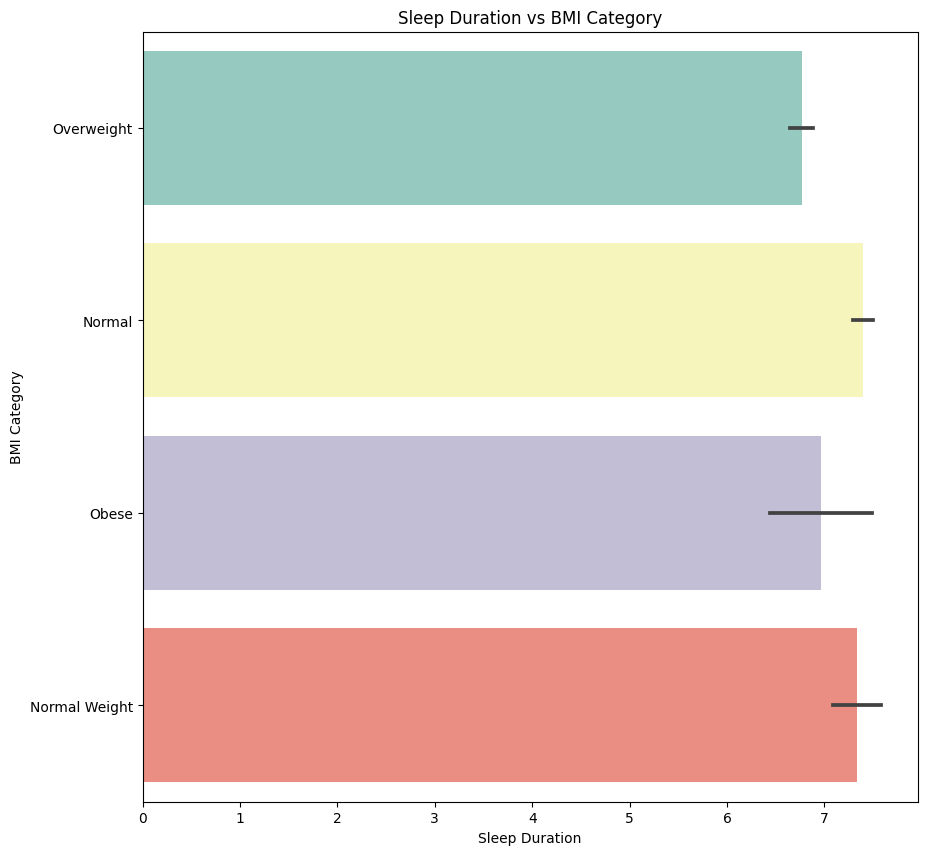

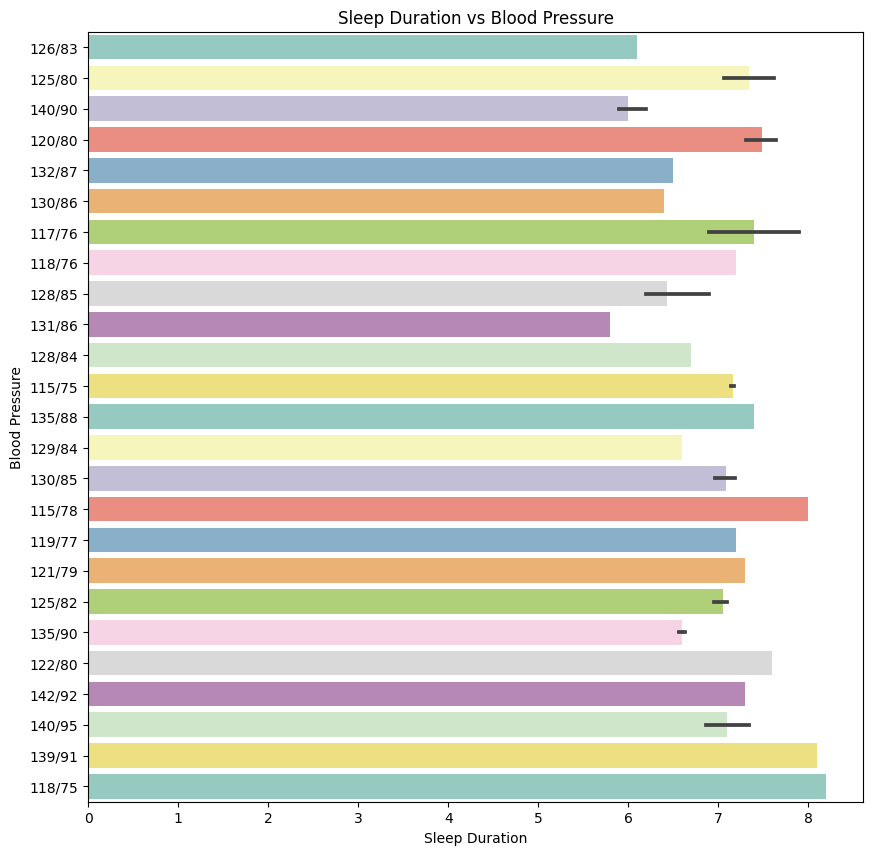

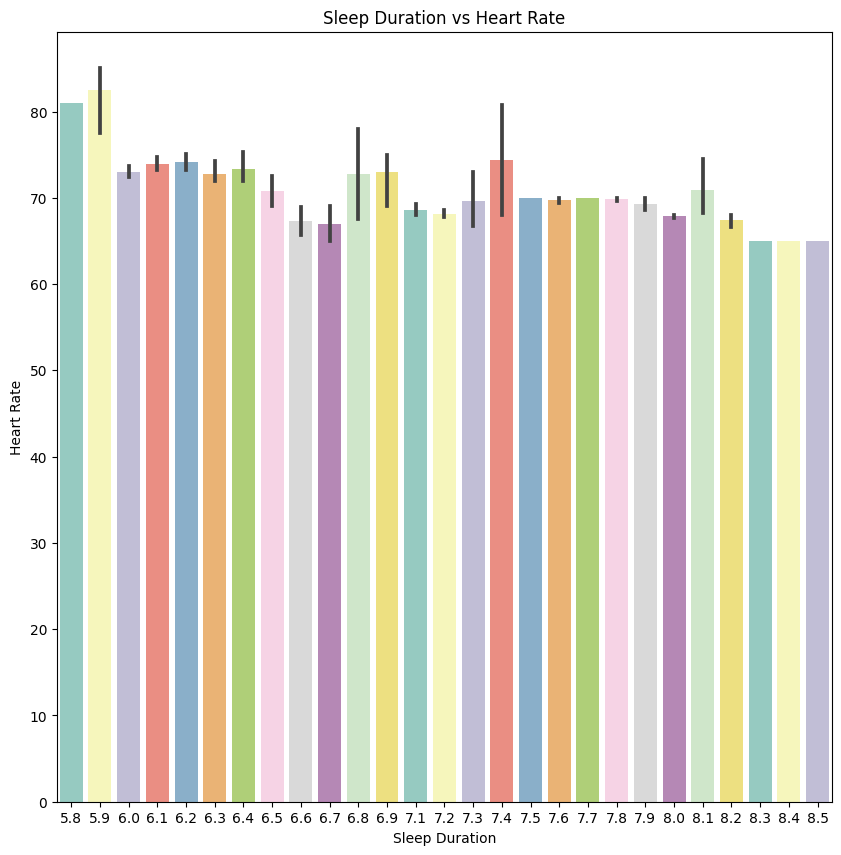

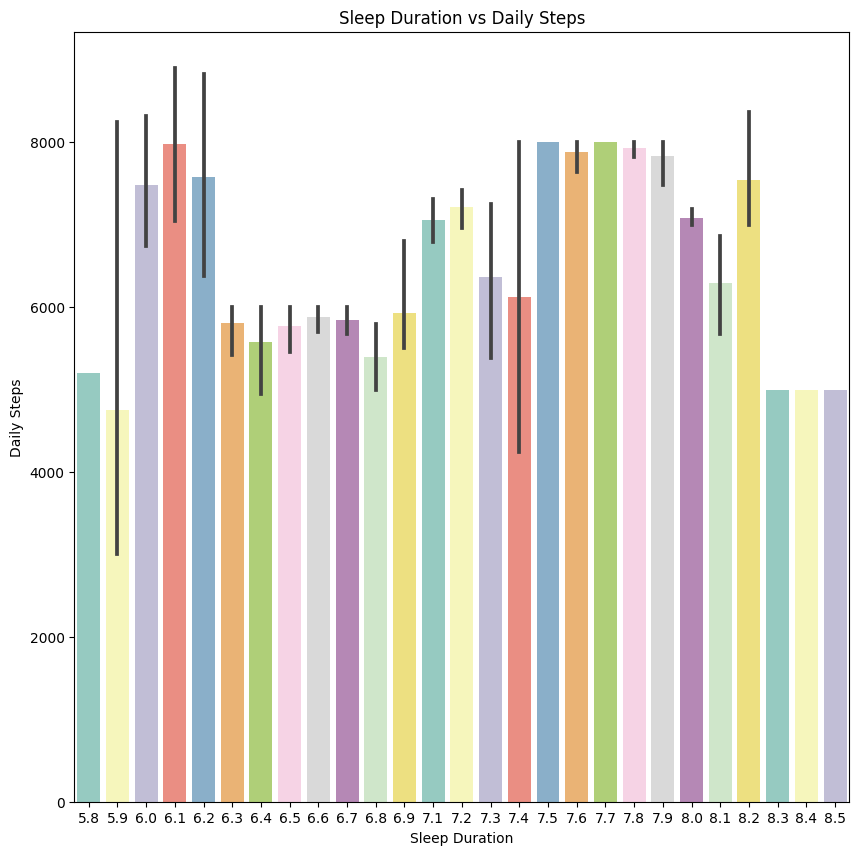

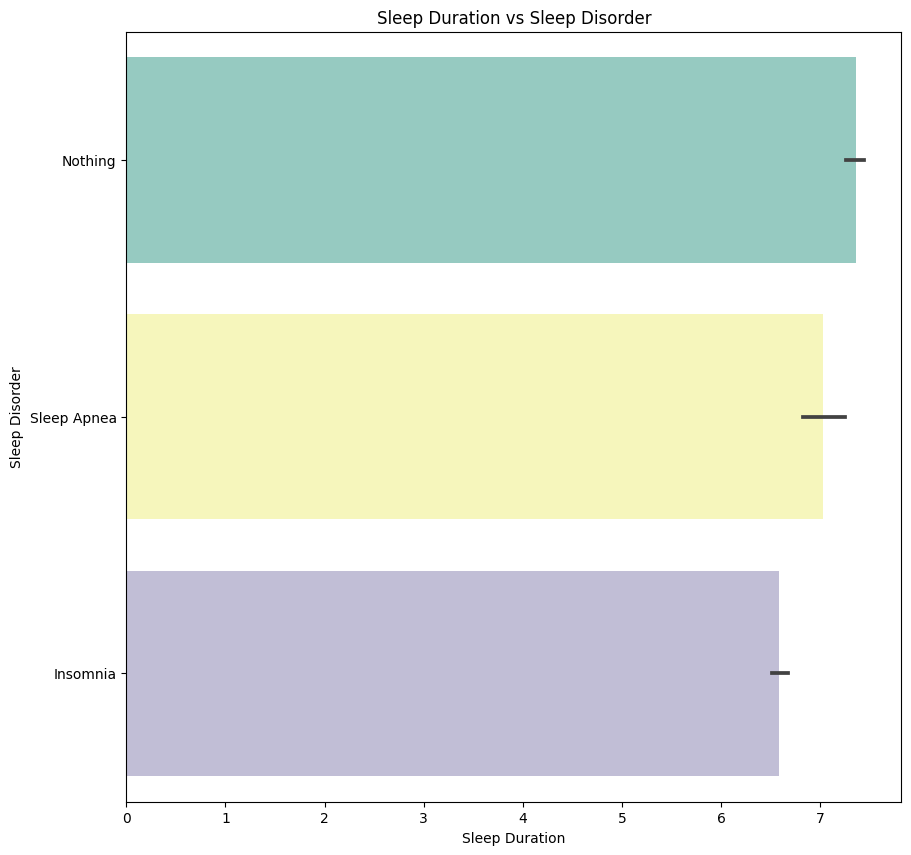

In [20]:
plot_barplots(df);

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


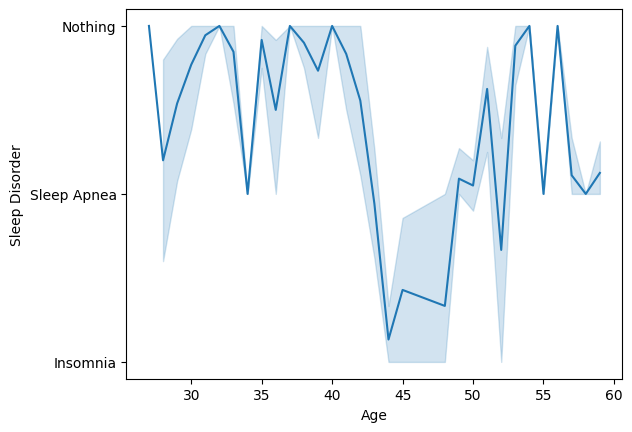

In [21]:
sns.lineplot(y="Sleep Disorder",x="Age",data=df);

## Outlier Analysis

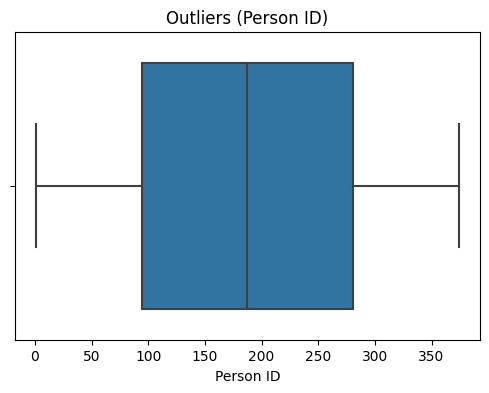

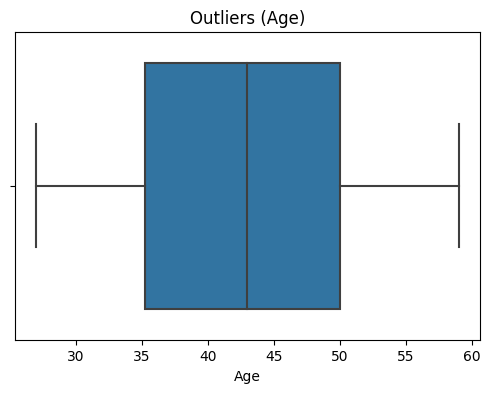

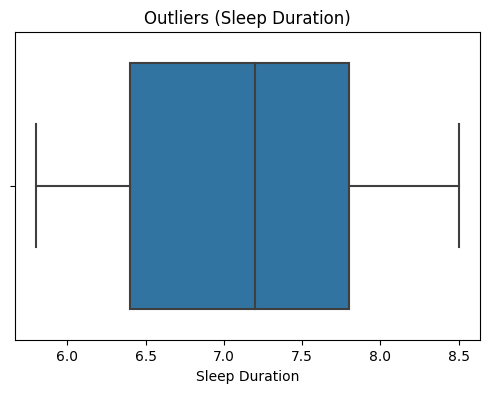

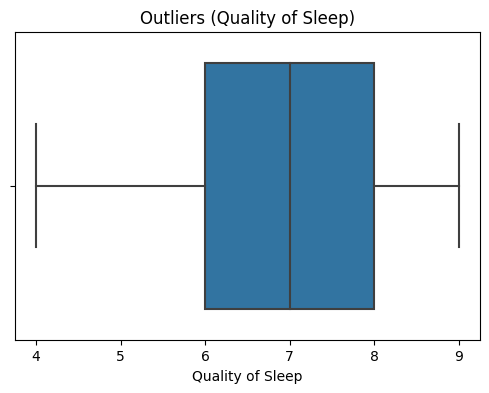

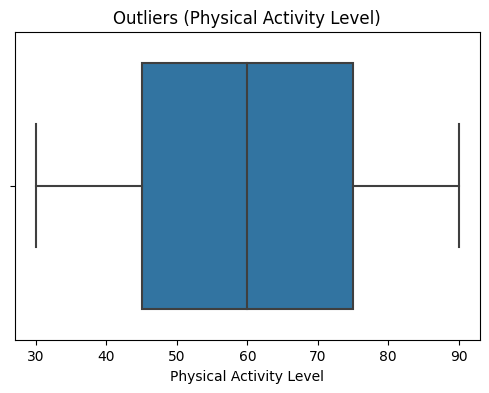

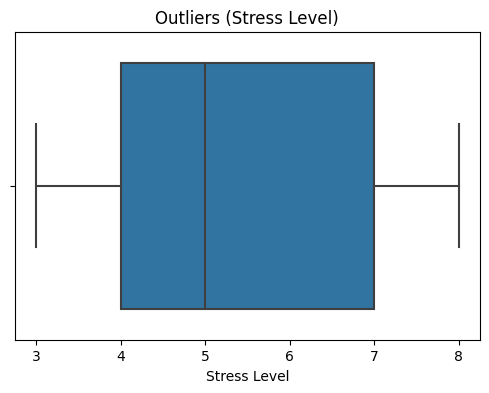

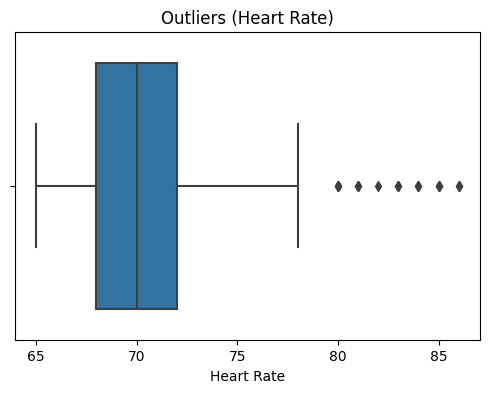

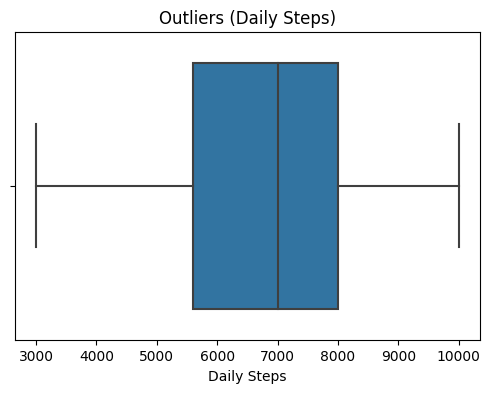

Outliers in the Person ID column: []
Outliers in the Age column: []
Outliers in the Sleep Duration column: []
Outliers in the Quality of Sleep column: []
Outliers in the Physical Activity Level column: []
Outliers in the Stress Level column: []
Outliers in the Heart Rate column: [85 85 85 82 80 80 81 81 84 84 80 83 83 86 86]
Outliers in the Daily Steps column: []


In [22]:
def detect_outliers(df, method="IQR", threshold=1.5):
    outlier_dict = {} 
    
    for col in df.select_dtypes(include=[np.number]):  
        if method == "IQR":
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        elif method == "z-score":
            mean = df[col].mean()
            std = df[col].std()
            z_scores = (df[col] - mean) / std
            outliers = df[np.abs(z_scores) > threshold]

        else:
            raise ValueError("Invalid method! You should use 'IQR' or 'z-score'.")

        outlier_dict[col] = outliers[col].values

        # Visualize outliers
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f"Outliers ({col})")
        plt.show()

    return outlier_dict

outliers = detect_outliers(df, method="IQR", threshold=1.5)

for key, values in outliers.items():
    print(f"Outliers in the {key} column: {values}")


In [23]:
df = df[~df["Heart Rate"].isin([85, 82, 80, 81, 84, 83, 86])]


In [24]:
df["Heart Rate"].value_counts()

Heart Rate
68    94
70    76
72    69
65    67
75    36
78     5
77     2
69     2
76     2
74     2
67     2
73     2
Name: count, dtype: int64

In [25]:

df[["Systolic Pressure", "Diastolic Pressure"]] = df["Blood Pressure"].str.split("/", expand=True).astype(int)
df.drop(columns=["Blood Pressure"], inplace=True)

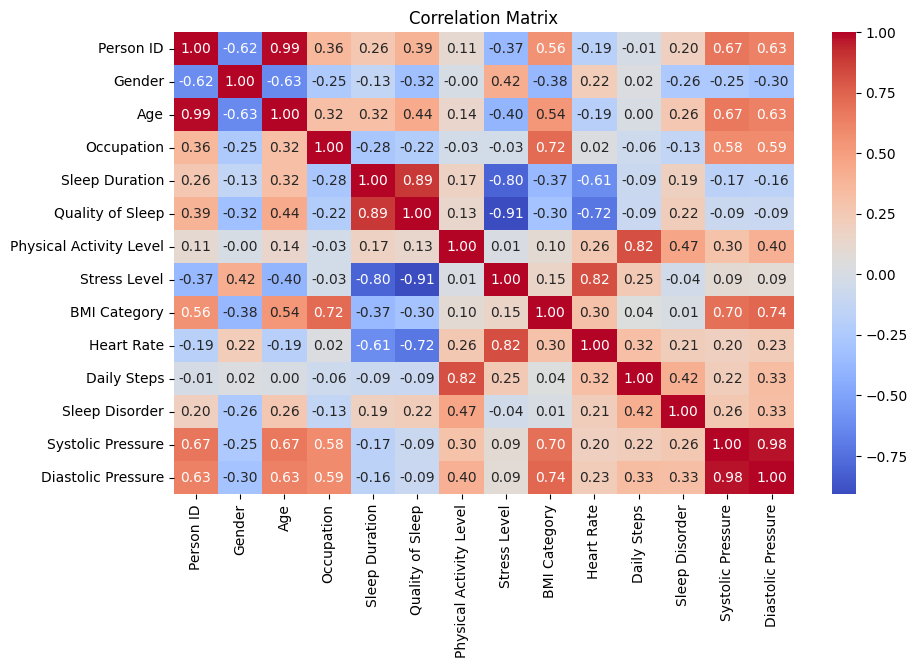

In [26]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()


for col in df.select_dtypes(include=["object"]).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])


plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [27]:
df = df.drop(columns=["Physical Activity Level","Person ID"])

## ML Modelling , Tuning and Evaluation


In [28]:
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

In [29]:
X = pd.get_dummies(X,drop_first=True)

In [30]:
X

,Age,Sleep Duration,Quality of Sleep,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Overweight
0,27,6.1,6,6,77,4200,126,83,True,False,False,False,False,False,False,False,True,False,False,True
1,28,6.2,6,8,75,10000,125,80,True,True,False,False,False,False,False,False,False,False,False,False
2,28,6.2,6,8,75,10000,125,80,True,True,False,False,False,False,False,False,False,False,False,False
7,29,7.8,7,6,70,8000,120,80,True,True,False,False,False,False,False,False,False,False,False,False
8,29,7.8,7,6,70,8000,120,80,True,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,3,68,7000,140,95,False,False,False,False,False,True,False,False,False,False,False,True
370,59,8.0,9,3,68,7000,140,95,False,False,False,False,False,True,False,False,False,False,False,True
371,59,8.1,9,3,68,7000,140,95,False,False,False,False,False,True,False,False,False,False,False,True
372,59,8.1,9,3,68,7000,140,95,False,False,False,False,False,True,False,False,False,False,False,True


In [31]:
le = LabelEncoder()

In [32]:
y = le.fit_transform(y)

In [33]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [39]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

In [40]:
results = {}

from sklearn.metrics import accuracy_score, classification_report

# Train and test all models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test data
    
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy score
    results[name] = accuracy  # Store the results
    
    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("="*50)


Logistic Regression - Accuracy: 0.8611
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.89      0.93      0.91        44
           2       0.79      0.79      0.79        14

    accuracy                           0.86        72
   macro avg       0.84      0.81      0.82        72
weighted avg       0.86      0.86      0.86        72

Support Vector Machine - Accuracy: 0.8472
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.89      0.91      0.90        44
           2       0.85      0.79      0.81        14

    accuracy                           0.85        72
   macro avg       0.82      0.80      0.81        72
weighted avg       0.85      0.85      0.85        72

Random Forest - Accuracy: 0.8889
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1   

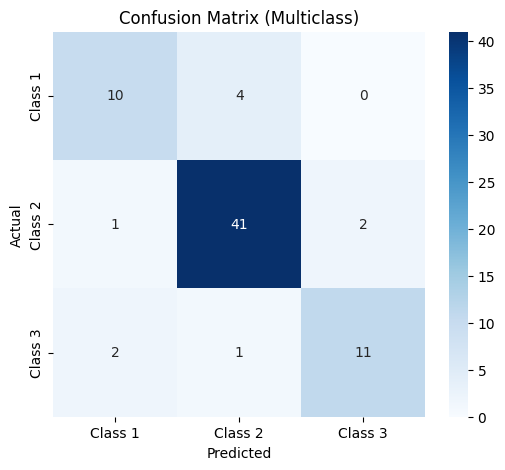

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Multiclass)")
plt.show()
